In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#standard libraries
import numpy as np

In [2]:
import snolab_neutrons.dist as sn
import scipy.constants as co 
k = co.physical_constants['Boltzmann constant in eV/K'][0] # Boltzmann constant in eV/K
mw = sn.get_thermal(1/(k*298))

In [3]:
print(mw(1e-10))

0.0027420244824077084


In [4]:
snolabmw = sn.get_snolab_thermal(1/(k*298))
print(snolabmw(1e-8))

1.3154413073548244e-07


In [5]:
Eff,ff = sn.read_snolab_HEflux()

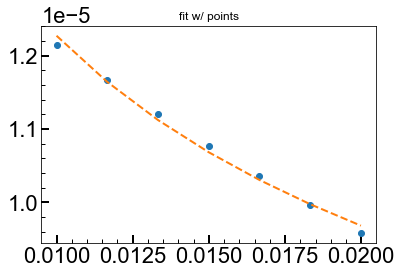

In [8]:
Eff_he_smooth,ff_he_smooth = sn.smooth_snolab_HEflux()
Eff_le_smooth,ff_le_smooth = sn.smooth_snolab_LEflux()
func = sn.extrapolate_snolab_flux(Eff_le_smooth,ff_le_smooth,low=0.5e-6,high=2e-2,plot=True)
Ef_extrap = np.geomspace(1, 1e4, 2000)/1e6
f_extrap_smooth = func(Ef_extrap)

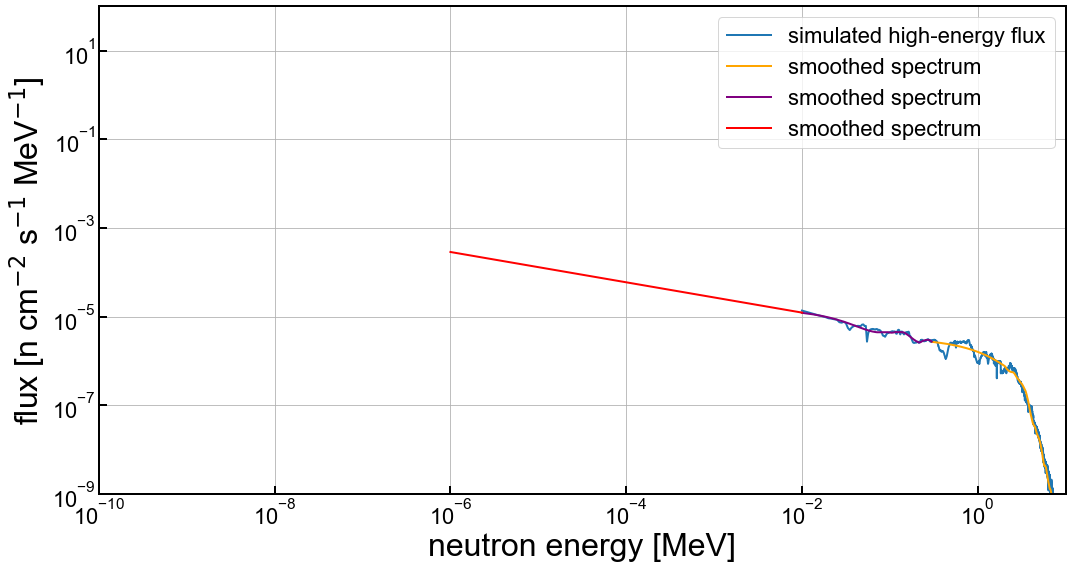

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


#print(estring)
ax1.plot(Eff, ff,label='simulated high-energy flux')
ax1.plot(Eff_he_smooth, ff_he_smooth,color='orange',label="smoothed spectrum")
ax1.plot(Eff_le_smooth, ff_le_smooth,color='purple',label="smoothed spectrum")
ax1.plot(Ef_extrap, f_extrap_smooth,color='red',label="smoothed spectrum")



ymin = 1e-9
ymax = 100.0

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-10, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()